<a href="https://colab.research.google.com/github/Seneprospect/DataScience/blob/main/MachineLearning_ventes_cosmetiques_senegal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APPRENTISSAGE SUPERVISE_REGRESSION**
### " L'apprentissage automatique (machine learning) c'est quand on apprend a un ordinateur a faire des choses sans le programmer directement pour ca. Au lieu de lui dire chaque etape a suivre, on lui montre des exemples et il apprend tout seul a reconnaitre des motifs et a prendre des decisions. "
# **1. APPRENTISSAGE SUPERVISE**
C'est quand on donne a l'ordinateur des exemples et les reponses correctes(les etiquettes) pour qu'il apprenne a faire des predictions sur de nouvelles données. L'ordinateur est "supervisé" pendant son apprentissage par les bonnes reponses qu'on lui fournit.

**A. REGRESSION**

Dans l'apprentissage supervisé, la regression, c'est quand on apprend a un ordinateur a predire un nombre. c'est comme lui apprendre a deviner une valeur sur une echelle continue(Predir les prix des maisons, Estimer la temperature, Prevoir les ventes).

**Comment ca marche ?** : on dispose d'une variable cible (label) que l'on souhaite predire a partir d'autres variables (caracteristiques "features").



On trouve des parametres qui donne le meilleur modele possible. Cela consiste a developper un modele en se servant d'un algorithme d'optimisation pour minimiser les erreurs entre le modele et nos données

# **MAE (Mean Absolute Error/Erreur absolue moyenne)**
C'est la moyenne des valeurs absolue des erreurs entre les vraies valeurs et les valeurs prédites.C'est a dire en moyenne a combien d'unités pres le modele se trompe

# **MSE (Mean Squared Error/Erreur quadratique moyenne)**
C'est la moyenne des carrées des erreurs entre les vraies valeurs  et les valeurs predites.

Comme les erreurs sont elevées au carrée, on pénalise d'avantage les grosses erreurs.

# **RMSE (Root Mean Squared Error/Racine de l'erreur qudratique moyenne)**
C'est la racine carrée du MSE : comme les MSE a des unités differentes, on prend la racine pour revenir a l'unité d'origine.

# **Corrélation**
C'est regarder si 2 variables ont tendance a evoluer en meme temps, et a dans quelle direction. C'est comme observer si elles "dansent ensemble".

- **corrélation positive** : Elles dansent dans le meme sens, c'est a dire quand l'une augmente, l'autre a aussi tendance a augmenter.
- **corrélation négative** : Elles dansent dans des sens opposés, c'est a dire que quand l'une augmente, l'autre a tendance a diminuer.
-**pas de corrélation** : Elles dansent chacune de leur coté, sans lien apparent.c'est a dire que le changement de l'une n'a pas vraiment d'influence sur l'autre.

**Remarque :** corrélation n'est pas causualité. Ce n'est pas parce que 2 choses sont corrélées que l'une provoque l'autre. Par exemple, la vente de glaces et le nombre de noyades augmentent souvent en été, mais ce n'est pas la glace qui provoque les noyades! C'est la saison chaude qui influence les 2.

Scikit-learn (souvent abrégé en sklearn) est une bibliotheque Python incontournable pour l'apprentissage automatique(machine learning). Imaginer une boite a outils remplie d'outils prete a l'emploi pour entrainer des modeles predictifs et analyser les données.



**PROJET MACHINE LEARNING-ASR**

Une entreprise sénégalaise de distribution de produits cosmétiques souhaite prédire ses ventes mensuelles selon plusieurs variables comme le prix du produit, les dépenses publicitaires, la satisfaction des clients, ou encore la saison. Tu es recruté comme data scientist pour les aider à mieux comprendre les facteurs qui influencent les ventes et anticiper les périodes de forte ou faible demande.

mois :Mois de l’année (Janvier, Février, etc.)

prix_produit :Prix moyen du produit (en FCFA)

pub_tv :Budget pub télé (en milliers FCFA)

pub_radio :Budget pub radio

pub_facebook :Budget pub sur Facebook

satisfaction_client :Score moyen des avis clients (1 à 5)

ventes :Ventes mensuelles du produit (en unités)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression  #Permet de creer des modeles de regression
from sklearn.metrics import mean_absolute_error , mean_squared_error #pour mesurer la qualité de la prediction(MAE,MSE,RMSE)
from sklearn.model_selection import train_test_split #Permet de diviser les donnees en donnees d'entrainement et de test


In [ ]:
#chargeons le DataSet
df = pd.read_csv('/content/ventes_cosmetiques_senegal.csv')
df.head(7)

,mois,prix_produit,pub_tv,pub_radio,pub_facebook,satisfaction_client,ventes
0,2021-01,3248.0,160.0,99.0,215.0,2.7,1145.0
1,2021-02,2931.0,52.0,147.0,196.0,4.7,1409.0
2,2021-03,3324.0,84.0,21.0,85.0,4.8,590.0
3,2021-04,3762.0,160.0,125.0,198.0,4.1,1465.0
4,2021-05,2883.0,187.0,103.0,204.0,3.3,1478.0
5,2021-06,2883.0,159.0,91.0,348.0,3.4,2676.0
6,2021-07,3790.0,144.0,103.0,188.0,4.3,793.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mois                 36 non-null     object 
 1   prix_produit         36 non-null     float64
 2   pub_tv               36 non-null     float64
 3   pub_radio            36 non-null     float64
 4   pub_facebook         36 non-null     float64
 5   satisfaction_client  36 non-null     float64
 6   ventes               36 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.1+ KB


**2. Nettoyage et Comprehension des données **

In [ ]:
#regaeder les données manquantes
df.isnull().sum()

,0
mois,0
prix_produit,0
pub_tv,0
pub_radio,0
pub_facebook,0
satisfaction_client,0
ventes,0


In [ ]:
#statistiques descriptives
df.describe()

,prix_produit,pub_tv,pub_radio,pub_facebook,satisfaction_client,ventes
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2918.611111,147.777778,97.027778,199.000000,3.719444,1386.277778
std,468.075103,44.678605,27.592428,63.718129,0.736330,566.701867
min,2043.000000,52.000000,21.000000,85.000000,2.500000,460.000000
25%,2660.750000,117.500000,84.750000,145.000000,3.100000,1033.750000
50%,2883.000000,152.500000,97.000000,201.000000,3.950000,1247.500000
75%,3203.000000,182.500000,110.250000,237.500000,4.300000,1772.750000
max,3926.000000,227.000000,157.000000,348.000000,4.800000,2676.000000


**3. Visualisation des données**

In [ ]:
#conversion de la colonne 'mois' en datetime
df['mois'] = pd.to_datetime(df['mois'])
df.head()

,mois,prix_produit,pub_tv,pub_radio,pub_facebook,satisfaction_client,ventes
0,2021-01-01,3248.0,160.0,99.0,215.0,2.7,1145.0
1,2021-02-01,2931.0,52.0,147.0,196.0,4.7,1409.0
2,2021-03-01,3324.0,84.0,21.0,85.0,4.8,590.0
3,2021-04-01,3762.0,160.0,125.0,198.0,4.1,1465.0
4,2021-05-01,2883.0,187.0,103.0,204.0,3.3,1478.0


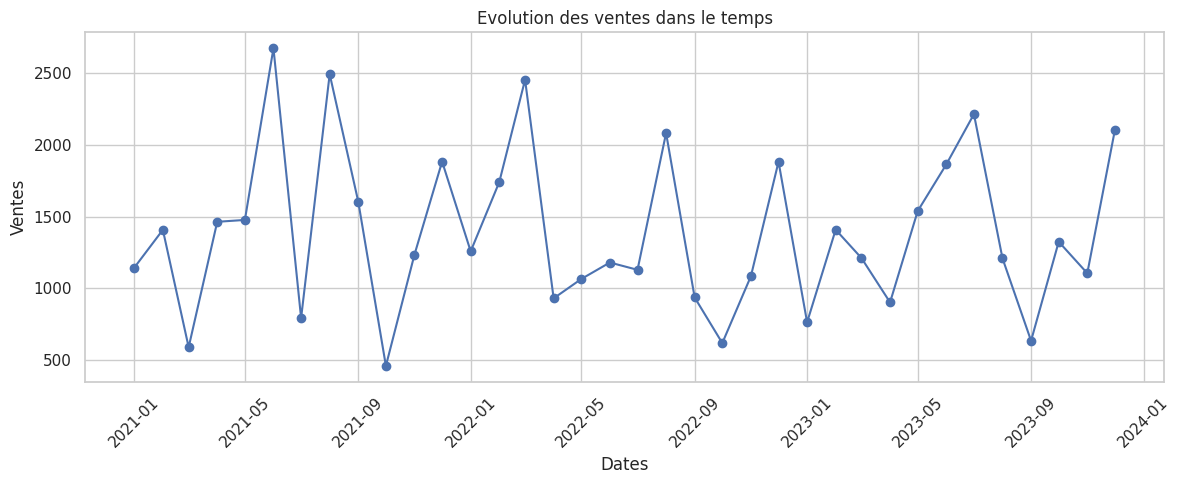

In [ ]:
sns.set(style='whitegrid') #ajouter une grille blanche en arriere plan
#evolution des ventes dans le temps
plt.figure(figsize=(12,5))
plt.plot(df['mois'], df['ventes'], marker='o')#
plt.title('Evolution des ventes dans le temps')
plt.xlabel('Dates')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.tight_layout() #ajuste automatiquement les mises en page pour que tous les  elements soient visibles
plt.show()

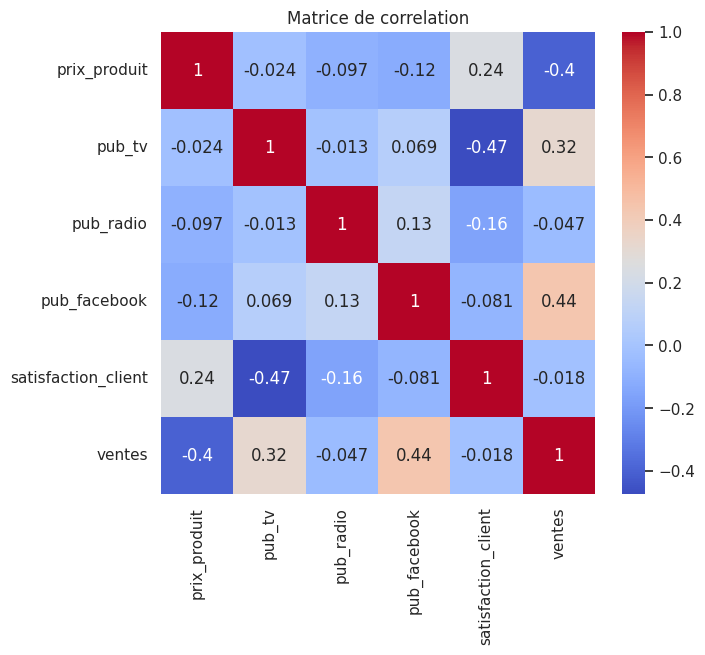

In [ ]:
#correlation entre variables
plt.figure(figsize=(7,6))
sns.heatmap(df.drop(columns='mois').corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de correlation')
plt.show()


A retenir :     
- correlation > 0.7 forte positive
- correlation entre -0.3 et 0.3 faible ou nulle
- correlation < -0.7 forte negative

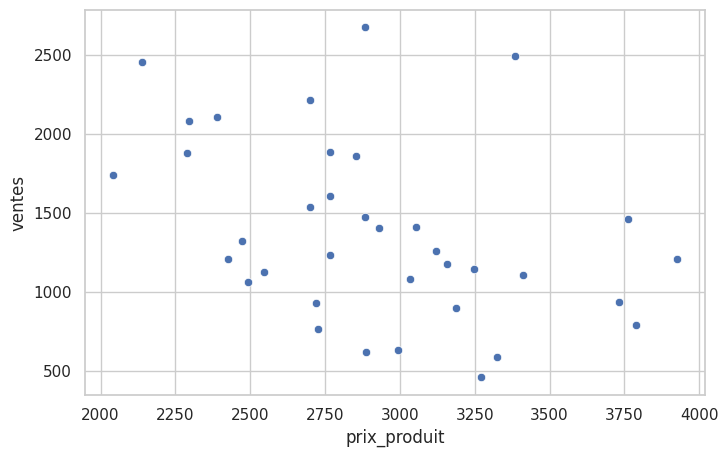

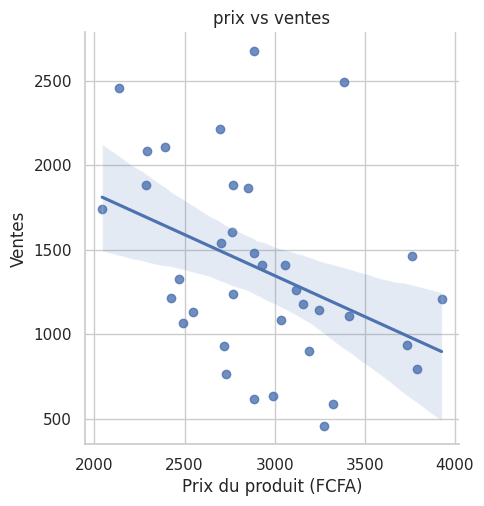

In [ ]:
#nuage de points entre prix du produit et ventes
plt.figure(figsize=(8,5))
sns.scatterplot(x='prix_produit', y='ventes', data=df)
sns.lmplot(x='prix_produit', y='ventes', data=df)

plt.title('prix vs ventes')
plt.xlabel('Prix du produit (FCFA)')
plt.ylabel('Ventes')
plt.show()

4-  **REGRESSION LINEAIRE SIMPLE**

La regression lineaire permet de modeliser la relation entre une variable explicative (x) et une variable cible (y). On suppose une relation linéaire de la forme :

ventes = a * prix_produit + b

Le but c'est de trouver les coefficients a (pente) et b (interception) qui minimisent l'erreur entre les valeurs predites et les vraies valeurs

# **a**- SELECTION DES VARIABLES





In [ ]:
X = df[['prix_produit']] #features
y = df[['ventes']]  #cible(label)

# **b- SEPARATION EN DONNEES D'ENTRAINEMENT ET TEST**

Quand on crée un modele d'intelligence artificiel (comme prediction ou classification), on veut etre sur qu'il fonctionne bien sur de nouvelles données, pas seulement sur celles qu'il a deja vue.

80% on utilise pour ENTRAINER le modele : le modele apprend a partir des exemples

20% pour TESTER le modele : on verifie si ce qu'il a appris est vraiment utile sur des données qu'il n'a jamais vue

In [ ]:
#rando_state=42 permet de repeter exactement la meme division chaque fois que le code est relancé cad les 80% et les 20% sera reprise a chaque execution
#test_size=0.2 est egal au 20% pour tester le modele

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **c- CREATION ET ENTRAINEMENT DU MODELE**



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **d- PREDICTIONS**



In [ ]:
y_pred = model.predict(X_test)


# **e- COEFFICIENTS DU MODELE**



In [ ]:
print('\n--- Coeficients de la regression lineaire simple ---')
print(f"Pente (a): {model.coef_[0][0] : .2f}") #si 1 seule variable coef_[0]
print(f"Ordonnée a l'origine (b): {model.intercept_[0]: .2f}")


--- Coeficients de la regression lineaire simple ---
Pente (a): -0.57
Ordonnée a l'origine (b):  3068.30


Pente = -0.57

Pour chaque augmentation de 1 FCFA du prix, le nombre de ventes diminue en moyenne de 0.57 unités

Cela confirme une relation negative entre le prix et les ventes

# f- EVALUATION DU MODELE

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('\n-- Evaluation du modele ---')
print(f'MAE (erreur absolue moyenne) : {mae:.2f}') #2f nous donne 2chiffres apres la virgule
print(f'MSE (erreur quadratique moyenne) : {mse:.2f}')
print(f"RMSE (racine de l'erreur quadratique) : {rmse:.2f}")


-- Evaluation du modele ---
MAE (erreur absolue moyenne) : 439.19
MSE (erreur quadratique moyenne) : 251086.41
RMSE (racine de l'erreur quadratique) : 501.09


MAE : en moyenne notre modele fait une erreur de 439.19

MSE : l'erreur moyenne au carrée 251086.41, ce qui montre les plus grandes erreurs

RMSE : En moyenne notre modele se trompe de 501.09 de ventes, une version plus lisible du MSE

# **REGRESSION LINEAIRE MULTIPLE**

La regression linéaire multiple permet de prédire une variable cible a partir de plusieurs variables

ventes = a1*x1 + a2*x2 + a3* x 3 + ... + b

Ici, nous allons inclure : le prix poduit, le budget publicataire, score des satisfactions clients

In [ ]:
df.columns

Index(['mois', 'prix_produit', 'pub_tv', 'pub_radio', 'pub_facebook',
       'satisfaction_client', 'ventes'],
      dtype='object')

# **1- SELECTION DS VARIABLES**


In [ ]:
X_multi = df[['prix_produit', 'pub_tv', 'satisfaction_client', 'pub_radio', 'pub_facebook']]

y_multi = df[['ventes']] #variable cible ou variable a expliquer



# **2. SEPARER LES DONNEES D'ENTRAINEMENT ET DE TEST**



In [ ]:

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42 )


# **3- CREATION ET ENTRAINEMENT DU MODELE**



In [ ]:

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

LinearRegression()

# **4- PREDICITIONS**



In [ ]:
y_pred_m = model_multi.predict(X_test_m)

# **5- COEFFICIENTS DU MODELE MULTIPLE**

In [ ]:
print("\n--- Coeficients de la regression lineaire multiple ---")

coeffs = pd.DataFrame({
    'Variable' : X_multi.columns,
    'Coefficient' : model_multi.coef_[0]
})

print(coeffs)


--- Coeficients de la regression lineaire multiple ---
              Variable  Coefficient
0         prix_produit    -0.468580
1               pub_tv     4.966902
2  satisfaction_client   186.011562
3            pub_radio    -2.077118
4         pub_facebook     3.659075


# **6- EVALUATION DU MODELE**

In [ ]:

mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
rmse_m = np.sqrt(mse_m)

print(f"MAE : {mae_m: 2f}")
print(f"MSE : {mse_m: 2f}")
print(f"RMSE : {rmse_m: 2f}")

MAE :  328.580105
MSE :  140200.441018
RMSE :  374.433493


Pour ameliorer notre modele de regression multiple, on peut essayer la regularisation (c'est une methode statistique qui permet de reduire le risque d'erreur lié au sur-ajustement des données d'entrainement), qui aide a :

- Reduire les surapprentissages (overfitting)
- Gerer les corrélations entre variables
- Reduire l'impact des variables peu informatives

On a 2 techniques a tester :    



# **RIDGE REGRESSION (REGRESSION TIKHONOV)**

C'est une methode d'estimation qui contraint ses coefficients a ne pas exploser, contrairement a la regression linéaire standard en grande dimension.

- Elle ajoute une pénalité basé sur la somme des carrés des coeff

- Elle réduit les coef mais ne les annule pas

La standardisation des données est une methode de transformation des données numeriques pour leur donner une echelle commune. Le but c'est de centrer les données autour de 0 avec un ecart type de 1

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

#Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)

#regression ridge
#le parametre de regularisation permet de penaliser les coeff trop grands pour rendre le modele plus simple et plus stable
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_scaled, y_multi)



Ridge()

In [ ]:
#prediction
y_pred_ridge = ridge_model.predict(X_scaled)

In [ ]:
#les coefficients
for feature, coef in zip(X_multi.columns, ridge_model.coef_):
  print(f"{feature}: {coef : .2f}")

prix_produit: -229.75
pub_tv:  225.87
satisfaction_client:  158.26
pub_radio: -47.72
pub_facebook:  213.92


In [ ]:
#evaluation du modele
mae_ridge = mean_absolute_error(y_multi, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_multi, y_pred_ridge))

print(f"MAE : {mae_ridge: 2f}")
print(f"RMSE : {rmse_ridge: 2f}")

MAE :  329.338658
RMSE :  404.874296


# **LASSO REGRESSION**

C'est une technique de regularisation qui consiste a appliquer une pénalité pour eviter le surapprentissage et ameliorer la precision des modeles statistiques

In [ ]:
from sklearn.linear_model import Lasso

#Regression lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_scaled, y_multi)


Lasso()

In [ ]:
#prediction
y_pred_lasso = lasso_model.predict(X_scaled)

In [ ]:
#les coefficients
for feature, coef in zip(X_multi.columns, lasso_model.coef_):
  print(f"{feature}: {coef : .2f}")

prix_produit: -236.82
pub_tv:  235.42
satisfaction_client:  168.26
pub_radio: -47.59
pub_facebook:  218.15


In [ ]:
#evaluation du modele
mae_lasso = mean_absolute_error(y_multi, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_multi, y_pred_lasso))

print(f"MAE : {mae_lasso :.2f}")
print(f"RMSE : {rmse_lasso :.2f}")
#defaut de retour, MAE : 331.13 et RMSE : 404.62

MAE : 329.34
RMSE : 404.87


Ici la regression multiple fait moins d'erreurs que Ridge et Lasso sont utiles quand il y'a trop de variables.

Si Ridge ou Lasso donnent les plus petites erreurs, on choisirait Ridge ou Lasso comme meilleur modele

# **REGRESSION POLYNOMINALE**

Parfois, la relation entre les variables n'est pas linéaire mais courbe. La regression polynominale permet de modeliser ces relations en ajoutant des termes au carré, au cube etc.

Exemple : ventes= ax^2 + bx + c

Nous allons terster cela sur la relation entre prix_produit et ventes



In [ ]:
#transformation du prix du produit (degré 2)

from sklearn.preprocessing import PolynomialFeatures #pour transformer les données lineaires en données non linéaires

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


In [ ]:
#Separation en train/test

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [ ]:
#modele

model_poly = LinearRegression()
model_poly.fit(X_train_p, y_train_p)

LinearRegression()

In [ ]:
#prediction

y_pred_p = model_poly.predict(X_test_p)

In [ ]:
#evaluation

mae_p = mean_absolute_error(y_test_p, y_pred_p)
mse_p = mean_squared_error(y_test_p, y_pred_p)
rmse_p = np.sqrt(mse_p)

print(f"MAE : {mae_p :.2f}")
print(f"MSE : {mse_p :.2f}")
print(f"RMSE : {rmse_p :.2f}")


MAE : 444.09
MSE : 266623.63
RMSE : 516.36


In [ ]:
#resumé ds metriques

comparaison = pd.DataFrame({
    'Modele' : ['Lineaire simple', 'Lineaire multiple', 'polynominale (deg 2)'],
    'MAE' : [mae, mae_m, mae_p],
    'MSE' : [mse, mse_m, mse_p],
    'RMSE' : [rmse, rmse_m, rmse_p]
})

comparaison

,Modele,MAE,MSE,RMSE
0,Lineaire simple,439.186738,251086.407031,501.085229
1,Lineaire multiple,328.580105,140200.441018,374.433493
2,polynominale (deg 2),444.088491,266623.631847,516.356110


Le modele linéaire multiple a les meilleures performances en termes de MAE, MSE et RMSE parmi les 3 modeles. Il a l'erreur absolue moyenne la plus basse (328.58), la plus faible MSE(140200.44), ce qui indique qu'il est le plus performant parmi les modeles testés.

Le modele linéaire multiple semble etre le meilleure choix pour prédire les ventes dans ce cas.


Disons que vous voulez prédire les ventes pour un produit spécifique. Vous avez les informations suivantes :

prix_produit = 2500

pub_tv = 15000

pub_radio = 6000

pub_facebook = 3000

satisfaction_client = 4.2

In [ ]:
# nouvelles données
new_data = pd.DataFrame({
    'prix_produit': [2500],
    'pub_tv': [15000],
    'pub_radio': [6000],
    'pub_facebook':[3000],
    'satisfaction_client': [4.2]
}, index=[0])


In [ ]:
#utilisation du modele entrainé pour faire une prediction


# Get the feature names used during training
feature_names = X_multi.columns

# Reorder or add missing columns to new_data
new_data = new_data.reindex(columns=feature_names, fill_value=0)

#affichage du resultat
ventes_predites = model_multi.predict(new_data)
print("Ventes prédites pour les nouvelles données :")
print(ventes_predites)

Ventes prédites pour les nouvelles données :
[[73425.65709863]]
